In [37]:
# Import libraries, features and settings (not all of these are needed so pull what you need)

import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [38]:
# read in the csvs as dataframes

df_train = pd.read_csv('../Data/train.csv')
df_test = pd.read_csv('../Data/test.csv')

df_train

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C23,C24,C25,C26,C27,C28,C29,C30,regression target,classification target
0,divorced,Holders of other higher courses,second choice,Management,daytime,Higher education - degree,65.00,Portuguese,no,no,...,5.0,5,0.0,0.000000,0,11.1,0.6,2.02,0.6500,failure
1,single,Over 23 years old,second choice,Veterinary Nursing,daytime,Secondary education,65.00,Portuguese,no,no,...,6.0,14,2.0,11.333333,0,11.1,0.6,2.02,0.5500,success
2,single,1st phase - general contingent,seventh choice,Communication Design,daytime,Frequency of higher education,59.50,Portuguese,yes,no,...,6.0,8,6.0,13.625000,0,10.8,1.4,1.74,0.6160,success
3,married,Over 23 years old,second choice,Social Service,daytime,Basic education 3rd cycle (9th/10th/11th year)...,66.55,Portuguese,no,no,...,6.0,0,0.0,0.000000,0,15.5,2.8,-4.06,0.5175,failure
4,single,1st phase - general contingent,fourth choice,Nursing,daytime,Secondary education,71.00,Portuguese,yes,no,...,7.0,7,6.0,13.900000,0,7.6,2.6,0.32,0.6865,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,single,1st phase - general contingent,third choice,Communication Design,daytime,Secondary education,67.00,Portuguese,yes,no,...,6.0,11,4.0,11.333333,0,13.9,NaN,0.79,0.6385,failure
3535,single,1st phase - general contingent,second choice,Basic Education,daytime,Secondary education,66.50,Portuguese,yes,no,...,8.0,8,8.0,12.625000,0,15.5,2.8,-4.06,0.6565,success
3536,single,1st phase - general contingent,second choice,Social Service (evening attendance),evening,Secondary education,50.00,Portuguese,no,no,...,6.0,6,NaN,12.500000,0,12.7,3.7,-1.70,0.5640,success
3537,single,1st phase - general contingent,fifth choice,Social Service,daytime,Secondary education,63.50,Portuguese,yes,no,...,6.0,7,6.0,13.428571,0,11.1,0.6,2.02,0.6020,success


In [39]:
# get number of instances and features

num_instance_names, num_feature_names = df_train.shape
print(f"Instances: {num_instance_names}")
print(f"Features: {num_feature_names}")

Instances: 3539
Features: 33


In [40]:
num_feature_names = df_train.select_dtypes(include=['int64', 'float64']).columns
cat_features = df_train.select_dtypes(include=['object']).columns
print("Numerical features:")
print(num_feature_names)
print("Categorical features:")
print(cat_features)

Numerical features:
Index(['C6', 'C14', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23',
       'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'regression target'],
      dtype='object')
Categorical features:
Index(['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C15', 'classification target'],
      dtype='object')


In [41]:
# Find features with missing values and the proportion of missing values

missing_values = df_train.isna().sum()
missing_prop = missing_values / len(df_train)
missing_data = pd.concat([missing_values, missing_prop], axis=1, keys=['Missing Values', 'Proportion'])
print(missing_data[missing_data['Missing Values'] > 0])

     Missing Values  Proportion
C0               29    0.008194
C4               49    0.013846
C5              108    0.030517
C8               82    0.023170
C9              142    0.040124
C11             158    0.044645
C12             170    0.048036
C13             120    0.033908
C15             138    0.038994
C17             148    0.041820
C20             171    0.048319
C22              16    0.004521
C23              28    0.007912
C25             144    0.040689
C29             160    0.045211


In [42]:
# Identify which numerical features are integers and which ones are not

discrete = []
continuous = []

for feature in num_feature_names:
    if df_train[feature].dtype == 'int64':
        discrete.append(feature)
    else:
        continuous.append(feature)

print(f"Discrete features: {discrete}")
print(f"Continuous features: {continuous}")


Discrete features: ['C14', 'C16', 'C18', 'C19', 'C21', 'C24', 'C27']
Continuous features: ['C6', 'C17', 'C20', 'C22', 'C23', 'C25', 'C26', 'C28', 'C29', 'C30', 'regression target']


In [43]:
# Identify binary features, others must be analysed manually.

binary = []

for feature in cat_features:
    num_unique = df_train[feature].nunique()
    if num_unique == 2:
        binary.append(feature)

print(f"Binary features: {binary}")

Binary features: ['C4', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C15', 'classification target']


In [44]:
# Get summary statistics of the first 3 numerical features

first3_numf = df_train.select_dtypes(include=['int64', 'float64']).iloc[:, :3]
print(first3_numf.describe())

                C6          C14          C16
count  3539.000000  3539.000000  3539.000000
mean     66.324696    23.204012     0.683526
std       6.619953     7.427675     2.275012
min      47.500000    17.000000     0.000000
25%      62.500000    19.000000     0.000000
50%      66.550000    20.000000     0.000000
75%      70.000000    25.000000     0.000000
max      95.000000    70.000000    20.000000


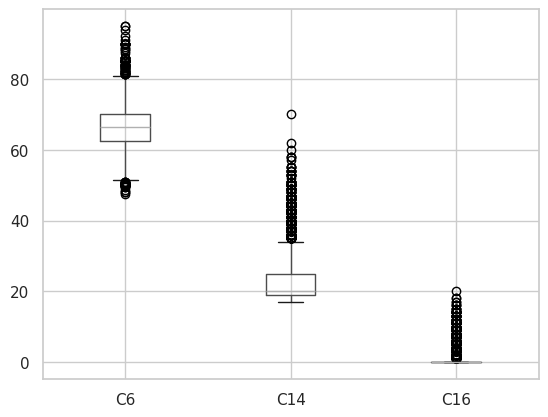

In [45]:
# box plot first 3 num features

first3_numf.boxplot()
plt.show()

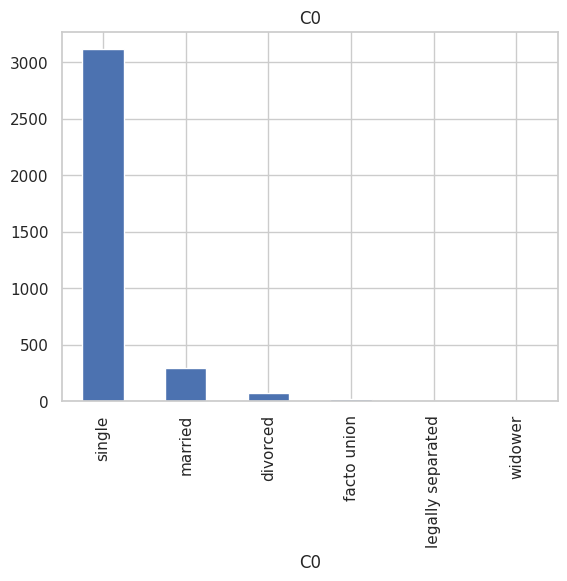

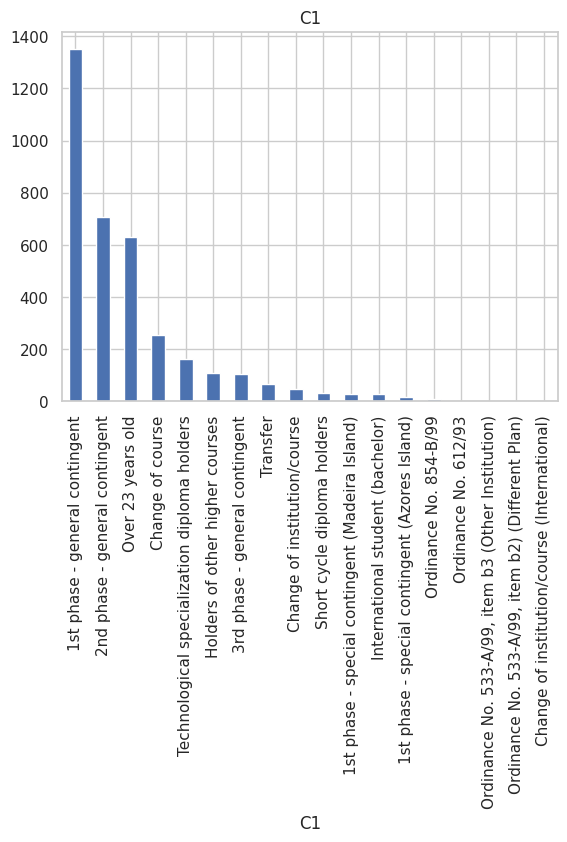

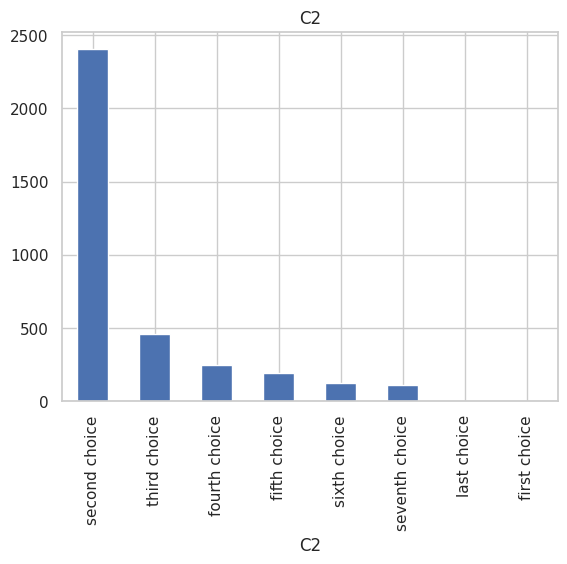

In [46]:

# Get category counts of the first 3 categorical features and visualize them using bar plots

first3_catf = df_train.select_dtypes(include=['object']).iloc[:, :3]
for feature in first3_catf:
    category_counts = df_train[feature].value_counts()
    category_counts.plot(kind='bar')
    plt.title(feature)
    plt.show()

In [47]:
# Find outliers 

# Isolation Forest method
clf = IsolationForest(random_state=0)
clf.fit(first3_numf)
outliers_if = clf.predict(first3_numf)

# IQR method
Q1 = first3_numf.quantile(0.25)
Q3 = first3_numf.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((first3_numf < lower_bound) | (first3_numf > upper_bound)).any(axis=1)

# Print results
print(f"Outliers detected using Forest Isolation method: \n{first3_numf[outliers_if == -1]}")
print(f"Outliers detected using IQR method: \n{first3_numf[outliers_iqr]}")

Outliers detected using Forest Isolation method: 
         C6  C14  C16
12    80.00   28    2
14    75.00   22    1
17    65.00   25    3
18    50.00   30   11
20    50.00   19    0
...     ...  ...  ...
3499  66.55   37    5
3500  72.50   24   11
3512  75.00   21    7
3528  65.00   25    8
3536  50.00   23    0

[622 rows x 3 columns]
Outliers detected using IQR method: 
         C6  C14  C16
0     65.00   35    0
3     66.55   42    0
5     70.00   21    2
12    80.00   28    2
14    75.00   22    1
...     ...  ...  ...
3518  65.00   36    0
3523  66.55   37    0
3528  65.00   25    8
3534  67.00   18    1
3536  50.00   23    0

[807 rows x 3 columns]


Rephrase Obviously\
\
"Outliers can skew the distribution of the data, affect the mean and variance, and reduce the accuracy of the model. Therefore, it's important to carefully consider how to handle outliers, which may involve removing them, transforming the data, or using robust modeling techniques that are less sensitive to outliers."

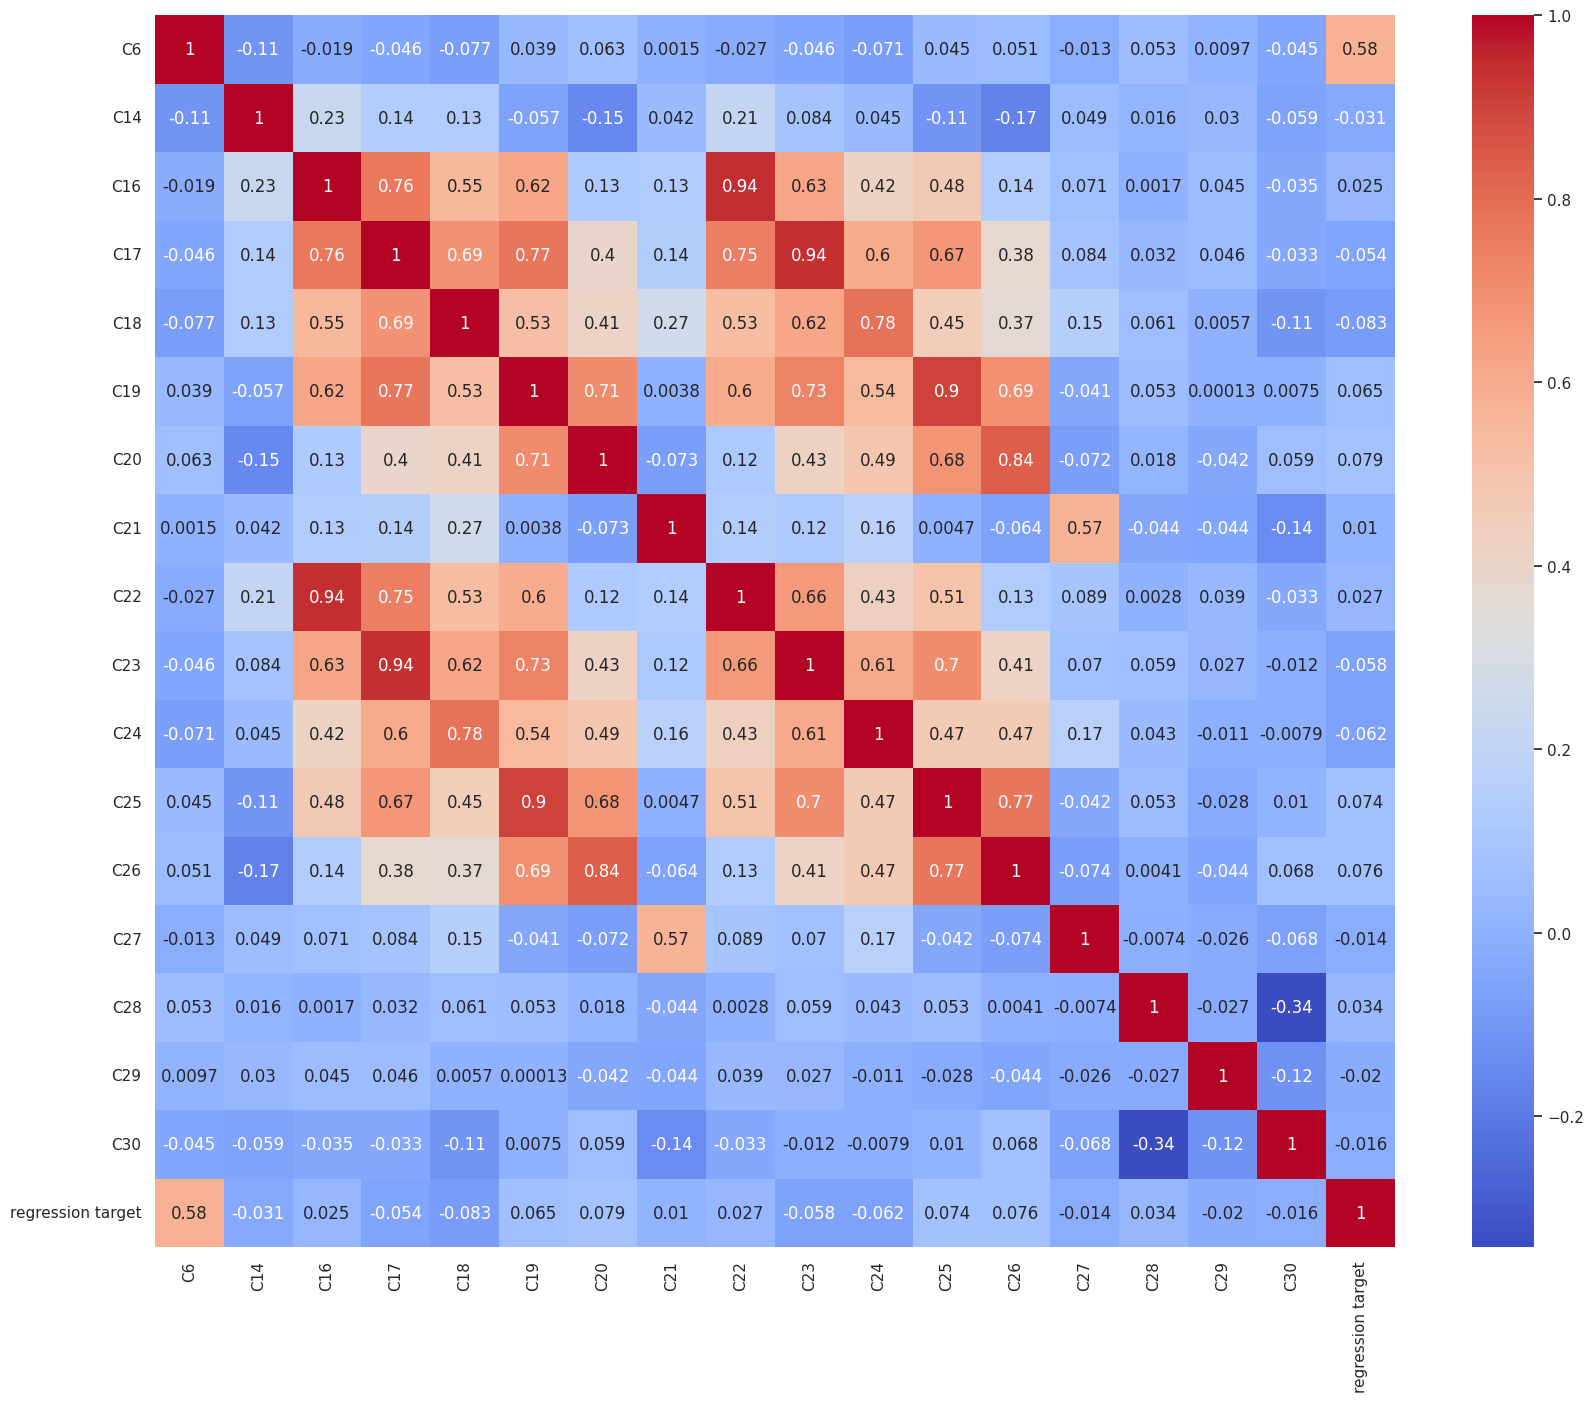

In [53]:
# Compute correlation matrix
num_features = df_train.select_dtypes(include=['float64', 'int64'])

corr = num_features.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()